In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
cycles=[]

In [41]:
tags=[]

In [42]:
f_number = 3

In [43]:
s = "../wheeze/RawData/14.txt"

In [44]:
data = np.loadtxt(open(s,"rb"),delimiter=",")

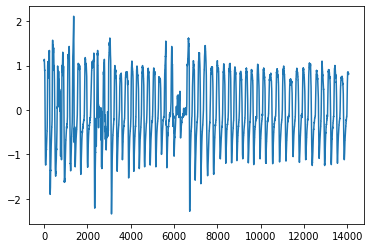

In [45]:
plot(data)

In [46]:
data_average = data.mean()
data = data - data_average

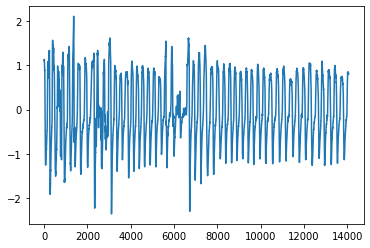

In [47]:
plot(data)

In [48]:
  def find_start(signal_data,pos):
            flag = False
            if signal_data[pos] < 0:
                flag = True
                for i in range(1, 4):
                    if signal_data[pos + i] < 0:
                        flag = False
            return (flag,pos) 

In [49]:
def separate_cycles(signal_data):
    data_min = 0
    min_pos = 0
    min_list=[]
    print(signal_data.shape)
    for i in range(signal_data.shape[0]-5):
        if signal_data[i]<data_min:
            data_min = signal_data[i]
            min_pos = i
        start,pos = find_start(signal_data,i)
        if start:
            min_list.append(min_pos)
            data_min = 0
    return min_list

In [50]:
mins = separate_cycles(data)

(14052,)


In [51]:
mins

[68,
 276,
 527,
 729,
 800,
 937,
 1222,
 1430,
 1689,
 2006,
 2330,
 2502,
 2511,
 2544,
 2582,
 2665,
 2863,
 3108,
 3371,
 3614,
 3900,
 4135,
 4391,
 4635,
 4895,
 5154,
 5416,
 5664,
 5998,
 6124,
 6220,
 6296,
 6470,
 6533,
 6562,
 6720,
 6972,
 7235,
 7543,
 7826,
 8133,
 8383,
 8652,
 8893,
 9170,
 9423,
 9674,
 9965,
 10228,
 10549,
 10869,
 11162,
 11491,
 11782,
 12073,
 12375,
 12692,
 12949,
 13254,
 13538,
 13853]

In [52]:
data = data + data_average

In [53]:
def split_cycles(min_list,raw_data,cycles_list,tag_list,batch_id):
    for  i in range(len(min_list)-1):
        d = np.zeros(50)
        c = np.zeros(50)
        j = 0
        l = min_list[i+1]-min_list[i]
        for k in range(min_list[i],min_list[i+1]-1):
            m = int(((k-min_list[i])*50.0)/l)
            d[m]+=raw_data[k]
            c[m]+=1
        for k in range(50):
            d[k] = d[k]/c[k]
        cycles_list.append(d)
        tag_list.append(batch_id+","+str(i))

/home/ric/Projects/Python/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


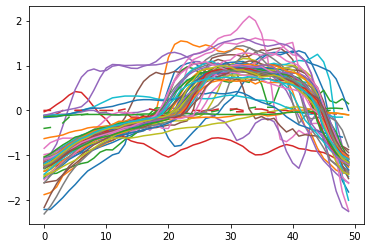

In [54]:
split_cycles(mins,data,cycles,tags,str(f_number))
for c in cycles:
    plot(c)

In [55]:
def differance(a,b):
    count = 0
    for i in range(a.shape[0]-1):
        #print(a[i],b[i])
        count += np.absolute(a[i]-b[i])
    return count/a.shape[0]

In [56]:
distance = np.zeros((len(cycles),len(cycles)))

In [57]:
for i in range(len(cycles)):
    for j in range(len(cycles)):
        distance[i,j]=differance(cycles[i],cycles[j])

In [58]:
import scipy

In [59]:
import scipy.cluster.hierarchy as sch

In [60]:
map = sch.linkage(distance, method='single')

ValueError: The condensed distance matrix must contain only finite values.

In [241]:
def dendogram_heat_map(distance_data,map_data,d_tags):
    """ Create s heat map with associated dendogram froma distance N*N numpy matrix and a scipy 
    scipy.cluster.hierarchy linkage 2d array"""
    # Adapted from http://stackoverflow.com/users/208339/steve-tjoa 
    fig = pylab.figure(figsize=(12,12))
    
    # Plot first dendrogram.
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])#set position
    den1 = sch.dendrogram(map_data, orientation='right',labels=tags)
    # No axis lables
    ax1.set_xticks([])
    #ax1.set_yticks([])

    # Plot second dendrogram.
    ax2 = fig.add_axes([0.31,0.74,0.61,0.2])#set position
    den2 = sch.dendrogram(map_data,labels=tags)
    # No axis lables
    #ax2.set_xticks([])
    ax2.set_yticks([])

    # Plot distance matrix as heat map.
    heat_map = fig.add_axes([0.32,0.1,0.6,0.6])
    idx1 = den1['leaves']
    idx2 = den2['leaves']
    # Reorder the distance data so that it matches with the dendogram order
    distance_data = distance_data[idx1,:]
    distance_data = distance_data[:,idx2]
    hm = heat_map.matshow(distance_data, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
    # No Y axis
    heat_map.set_yticks([])
    heat_map.set_xticks([])
    
 

    # Plot colorbar.
    axcolor = fig.add_axes([0.93,0.1,0.02,0.6])
    pylab.colorbar(hm, cax=axcolor)

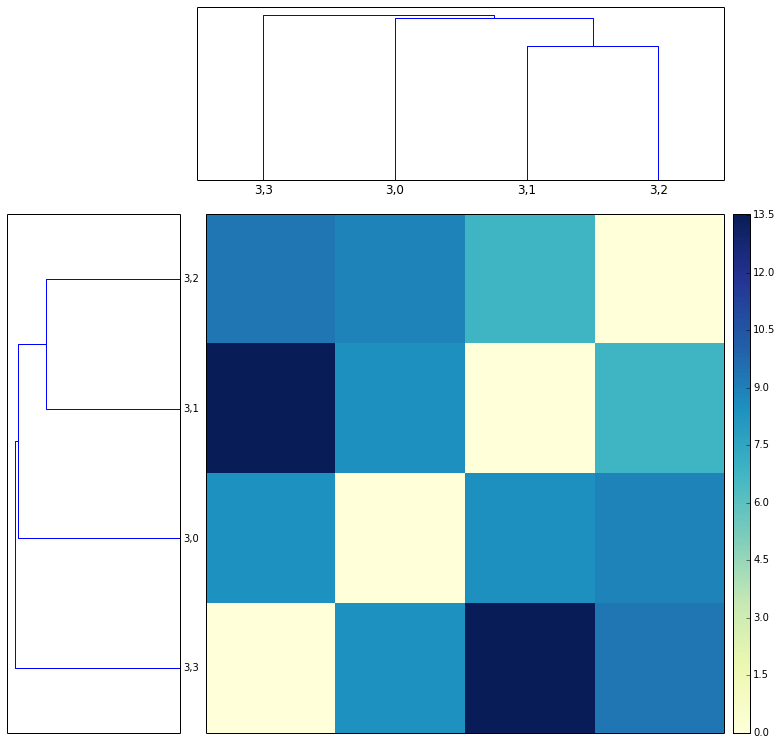

In [242]:
dendogram_heat_map(distance,map,tags)

Get the cycle numbers of each cycle

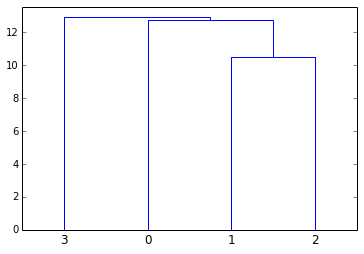

In [243]:
d7 = sch.dendrogram(map)

Look at the lone cycle 12

In [244]:
plot(cycles[12])

IndexError: list index out of range

Look at the individual blocks of cycles

In [ ]:
plot(cycles[10])
plot(cycles[4])
plot(cycles[13])
plot(cycles[5])
plot(cycles[7])
plot(cycles[9])
plot(cycles[6])
plot(cycles[8])

In [ ]:
plot(cycles[11])
plot(cycles[14])
plot(cycles[15])

In [ ]:
plot(cycles[0])
plot(cycles[2])
plot(cycles[3])
plot(cycles[1])